## 1. Perceptron

<img src="./img/perceptron-6168423.jpg" alt="drawing" width="650"/>

Empezamos cargando librerías

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

Cargamos datos. Utilizaremos el dataset de pingüinos de seaborn:

In [39]:
df = sns.load_dataset("penguins")

# Limpiamos un poco los datos
df.dropna(inplace=True)
cleanup_nums = {"species": {"Adelie": 0,
                            "Chinstrap": 1,
                            "Gentoo": 2},
               "sex": {"Male": 0,
                       "Female": 1}}
df.replace(cleanup_nums, inplace=True)
df = pd.get_dummies(df)

df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,0,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,0,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,0,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,0,39.3,20.6,190.0,3650.0,0,0,1,0,1


Dividimos en train test

In [40]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 9)
(67, 9)
(266,)
(67,)


Vamos a probar un Perceptrón

In [42]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron()
per_clf.fit(X_train, y_train)
per_clf.score(X_test, y_test)

0.34328358208955223

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

C:\Users\TheBridge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9850746268656716

Probemos a estandarizar:

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_s = sc.transform(X_train)
X_test_s = sc.transform(X_test)

per_clf = Perceptron()
per_clf.fit(X_train_s, y_train)
per_clf.score(X_test_s, y_test)

1.0

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_s, y_train)
log_reg.score(X_test_s, y_test)

1.0

### EJEMPLO no lineal:

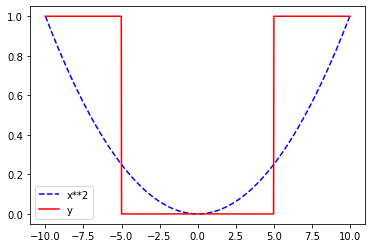

In [46]:
x_nl = np.linspace(-10, 10, 1000)
y_nl = (x_nl**2) > 25

plt.plot(x_nl, (x_nl**2)/100, 'b--', label='x**2')
plt.plot(x_nl, y_nl, 'r', label='y')
plt.legend()

In [47]:
X_nl = pd.DataFrame({'X': x_nl})
Y_nl = pd.Series(y_nl)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_nl,
                                                        Y_nl,
                                                        test_size=0.2,
                                                        random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train2)
X_train_s2 = sc.transform(X_train2)
X_test_s2 = sc.transform(X_test2)

per_clf = Perceptron()
per_clf.fit(X_train_s2, y_train2)
per_clf.score(X_test_s2, y_test2)

0.62

In [48]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_s2, y_train2)
log_reg.score(X_test_s2, y_test2)

0.33

En este caso, en ambos modelos, parece que la estandarización es la clave, y es que ambos modelos son muy dependientes de las escalas de los datos.

Aun así, si nos fijamos en el comportamiento base del perceptrón, parece que no es muy bueno (pese a que con ayuda del StandardScaler mejora mucho). Y eso que estamos hablando de un modelo muy sencillito. Por lo tanto, parece razonable estudiar configuraciones más complejas:

## 2. Multi Layer Perceptron

In [49]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter = 500)
mlp.fit(X_train, y_train)

print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.5375939849624061
0.5223880597014925


Probemos otra configuración. Es posible crear una red neuronal desde la propia función de MLPClassifier()

In [50]:
mlp = MLPClassifier(max_iter = 500,
                   activation='tanh',
                   hidden_layer_sizes = (150, 150, 150))

mlp.fit(X_train, y_train)

print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.6541353383458647
0.6865671641791045


Bueno, parece que nuestra red de perceptrones mejora mucho el perceptrón por sí solo, pero seguimos obteniendo algo que dista mucho de lo que queremos. Y es que, al igual que acabamos de ver para el perceptrón, las redes multicapa de perceptrones utilizan descenso del gradiente, y por tanto son muy sensibles al escalado.

Estandarizamos para el siguiente ejemplo:

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_s = sc.transform(X_train)
X_test_s = sc.transform(X_test)

per_clf = Perceptron()
per_clf.fit(X_train_s, y_train)
print(per_clf.score(X_train_s, y_train))
print(per_clf.score(X_test_s, y_test))

1.0
1.0


In [52]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_s, y_train)
print(log_reg.score(X_train_s, y_train))
print(log_reg.score(X_test_s, y_test))

1.0
1.0


In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal =scaler.transform(X_train)
X_test_scal =scaler.transform(X_test)

mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train_scal, y_train)
print(mlp.score(X_train_scal, y_train))
print(mlp.score(X_test_scal, y_test))

1.0
1.0


Evidentemente, como estamos con unos datos muy preparados para este ejemplo, al estandarizar nos ofrecen un resultado perfecto, como podíamos esperar tras ver el ejemplo anterior.

De este modo, se pone de manifiesto la importancia del escalado en este tipo de problemas, ya que son muy dependientes de las relaciones entre variables. Por ello, será muy importante trabajar con el StandardScaler cuando hablemos de modelos lineales, ya que tanto el ``Perceptrón``, como la ``Regresión Logística`` o la configuración ``MLP`` consiguen un resultado muy bueno tras su aplicación.

Pero bueno, realmente no hemos visto nada que nos mejore una barbaridad, así que hagamos un ejercicio donde pongamos las cosas (un poquito) más difíciles a nuestro modelo:

### EJERCICIO

Utiliza los datos no lineales del ejemplo del perceptrón y la regresión lineal donde daban malos resultados y comprueba qué pasa con la MLP que acabamos de ver:

Prueba tanto directamente como aplicando el escalado:

0.9975
0.995


C:\Users\TheBridge\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


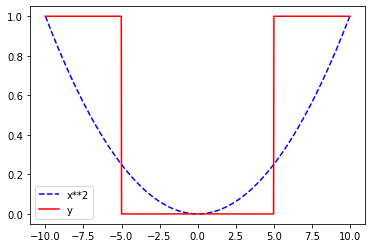

In [55]:
x_nl = np.linspace(-10, 10, 1000)
y_nl = (x_nl**2) > 25

plt.plot(x_nl, (x_nl**2)/100, 'b--', label='x**2')
plt.plot(x_nl, y_nl, 'r', label='y')
plt.legend()

X_nl = pd.DataFrame({'X': x_nl})
Y_nl = pd.Series(y_nl)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_nl,
                                                        Y_nl,
                                                        test_size=0.2,
                                                        random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train2)
X_train_s2 = sc.transform(X_train2)
X_test_s2 = sc.transform(X_test2)

mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train_s2, y_train2)
print(mlp.score(X_train_s2, y_train2))
print(mlp.score(X_test_s2, y_test2))

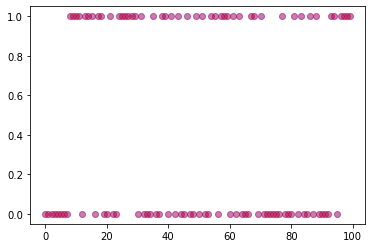

In [67]:
preds = mlp.predict(X_test_s2)

plt.plot(preds[:100], 'bo', alpha = 0.3)
plt.plot(y_test2.values[:100], 'ro', alpha = 0.3)

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train2)
X_train_s2 = sc.transform(X_train2)
X_test_s2 = sc.transform(X_test2)

mlp = MLPClassifier(max_iter=5000)
mlp.fit(X_train_s2, y_train2)
print(mlp.score(X_train2, y_train2))
print(mlp.score(X_test2, y_test2))

0.5975
0.54


### Ejercicio

En este caso, vamos a ver cómo se comportan nuestros modelos con la clasificación de medicamentos. Para ello, leeremos un dataset con algunas columnas categóricas, que deberemos convertir a numéricas de la forma que creamos conveniente.

Utiliza un reparto train/test de 70/30.

In [69]:
df = pd.read_csv("../drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [71]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64